In [1]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from glob import glob
import os
import os.path
from os import path

In [2]:
num_classes = 3
resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

model = Sequential()
model.add(ResNet50(include_top=False, pooling='avg', weights=resnet_weights_path))
model.add(Dense(num_classes, activation='softmax'))

model.layers[0].trainable = False

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
#loading files into directory
data_dir  = "../input/data12345/data/data/SkyLounge/"
data_dir1="../input/test12345678/test1/"



train_dir = data_dir+'train/'
test_dir1  = data_dir1+'test1/'
val_dir   = data_dir + 'validation/'
people = train_dir + 'people/'
ambience = train_dir + 'ambience/'
food = train_dir + 'food/'

people1 = test_dir1 + 'people/'
ambience1 = test_dir1 + 'ambience/'
food1=test_dir1 +'food/'

people_cases = glob(people + '/*.jpg')

food_cases =glob(food + '/*.jpg')

ambience_cases=glob(ambience + '/*.jpg')

food1_cases = glob(food1+'/*.jpg')
people1_cases = glob(people1+'/*.jpg')
ambience1_cases=glob(ambience1+'/*.jpg')

train_data = []
test_data=[]
#labelling
for img in food_cases:
    train_data.append((img,1))
for img in people_cases:
    train_data.append((img,2))    
for img in ambience_cases:
    train_data.append((img, 0))
for img in food1_cases:
    test_data.append((img,1)) 
for img in people1_cases:
    test_data.append((img,2))
for img in ambience1_cases:
    test_data.append((img,0))    




In [4]:
import numpy as np
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

image_size = 150

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)
print(os.listdir("../input/data12345/data/data/SkyLounge/test/ambience"))

['7.jpg', 'Screen Shot 2018-08-09 at 1.05.21 PM.png', '9844_rsr001_00_p_1024x768.jpg', '47f32da61d6142858282f1ad71b8b708.jpg', '5.jpg', '2.jpg', '3.jpg', '10.jpg', '3977985_297_z.jpg']


In [5]:
lister1=[]
lister2=[]
for i in range(0,len(test_data)):
    lister1.append(test_data[i][0])
for i in range(0,len(test_data)):
    lister2.append(test_data[i][1])


In [6]:
#fitting the model with new data
image_size = 150
nb_train_samples = 26
batch_size = 26

EPOCHS = 10
STEPS = nb_train_samples / batch_size
data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                             horizontal_flip = True,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.2,
                                             shear_range = 0.2,
                                             zoom_range = 0.2
                                            )
            
data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input            
                                          )

train_generator = data_generator_with_aug.flow_from_directory(
       directory = '../input/data12345/data/data/SkyLounge/train/',
       target_size = (image_size, image_size),
       batch_size = batch_size,
       class_mode = 'categorical')

validation_generator = data_generator_no_aug.flow_from_directory(
       directory = '../input/data12345/data/data/SkyLounge/validation/',
       target_size = (image_size, image_size),
       class_mode = 'categorical')

test_generator = data_generator_no_aug.flow_from_directory(
       directory = '../input/data12345/data/data/SkyLounge/test/',
       target_size = (image_size, image_size),
       batch_size = batch_size,
       class_mode = 'categorical')

model.fit_generator(
       train_generator, 
       epochs = EPOCHS,
       steps_per_epoch=STEPS,
       validation_data=validation_generator)

Found 59 images belonging to 3 classes.
Found 14 images belonging to 3 classes.
Found 26 images belonging to 3 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
3/3 [==============================] - 9s 3s/step - loss: 1.3528 - acc: 0.3220 - val_loss: 1.4510 - val_acc: 0.5000
Epoch 2/10
3/3 [==============================] - 6s 2s/step - loss: 1.0338 - acc: 0.5254 - val_loss: 0.9018 - val_acc: 0.5714
Epoch 3/10
3/3 [==============================] - 6s 2s/step - loss: 0.7842 - acc: 0.7797 - val_loss: 0.7068 - val_acc: 0.6429
Epoch 4/10
3/3 [==============================] - 6s 2s/step - loss: 0.5407 - acc: 0.7966 - val_loss: 0.6078 - val_acc: 0.8571
Epoch 5/10
3/3 [==============================] - 6s 2s/step - loss: 0.5084 - acc: 0.8644 - val_loss: 0.7621 - val_acc: 0.7143
Epoch 6/10
3/3 [==============================] - 6s 2s/step - loss: 0.4763 - acc: 0.8475 - val_loss: 0.5212 - val_acc: 0.7857
Epoch 7/10
3/3 [==============================] - 6s 2s/step - loss: 0

In [7]:
image_dirpneumonia = '../input/food12345/Screen Shot 2018-08-09 at 1.09.09 PM.png'
listn=[]
listn.append(image_dirpneumonia)

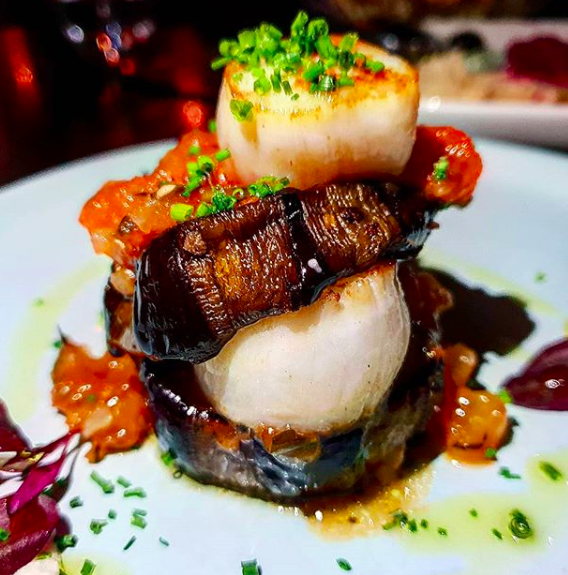

array([1])

In [8]:
from IPython.display import Image, display
display(Image(image_dirpneumonia))
prep=read_and_prep_images(listn)
pred=model.predict_classes(prep)
pred

In [9]:
k="../input/people12345/31218778_176311183072746_3063827814093422592_n.jpg"
listw=[]
listw.append(k)


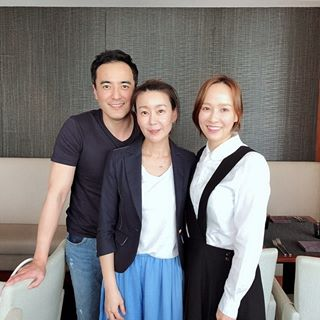

array([2])

In [10]:
from IPython.display import Image, display
display(Image(k))
prep=read_and_prep_images(listw)
pred=model.predict_classes(prep)
pred

In [11]:
t="../input/people12345/31218778_176311183072746_3063827814093422592_n.jpg"
listw=[]
listw.append(k)

In [12]:
h="../input/ambience1234/dinercheque-skylounge-en-skybar-pi-amsterdam-1.jpg"

In [13]:
listr=[]
listr.append(h)

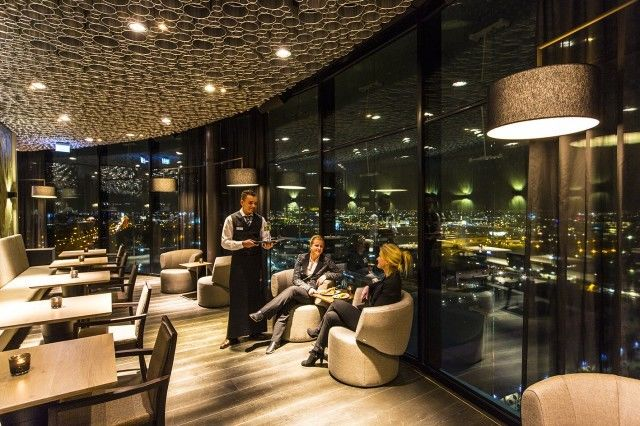

array([0])

In [14]:
from IPython.display import Image, display
display(Image(h))
prep=read_and_prep_images(listr)
pred=model.predict_classes(prep)
pred

In [15]:
w="../input/people123456/32370006_444844809287823_5054107172204445696_n.jpg"

In [16]:
listb=[]
listb.append(h)

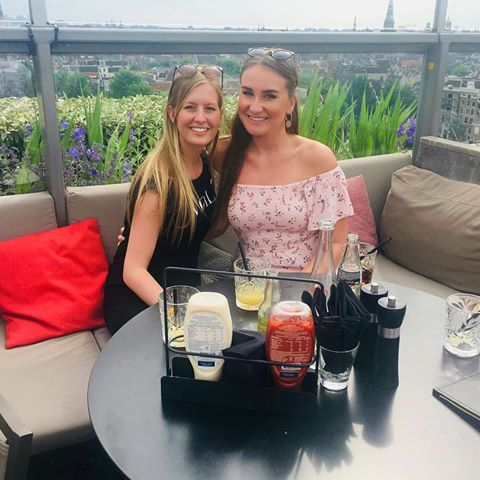

array([0])

In [17]:
from IPython.display import Image, display
display(Image(w))
prep=read_and_prep_images(listb)
pred=model.predict_classes(prep)
pred

In [18]:
lister1=[]
lister2=[]
for i in range(0,len(test_data)):
    lister1.append(test_data[i][0])
for i in range(0,len(test_data)):
    lister2.append(test_data[i][1])

In [19]:
import os.path
from os import path
def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):

    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

In [20]:
testing="../input/test12345678/test1/test1/"

In [21]:
people = testing + 'people/'
ambience = testing + 'ambience/'
food = testing + 'food/'

In [22]:
people_cases = glob(people + '/*.jpg')

food_cases =glob(food + '/*.jpg')

ambience_cases=glob(ambience + '/*.jpg')
food_cases

['../input/test12345678/test1/test1/food/Skylounge_food_0075.jpg',
 '../input/test12345678/test1/test1/food/skylounge-amsterdam-3.jpg',
 '../input/test12345678/test1/test1/food/skylounge-amsterdam-april13-Amsterdam-011-Small.jpg',
 '../input/test12345678/test1/test1/food/SXzAv1zWgqD7vIArigZLbVtvsLZLP63ovydJgxtHDi0.jpg']

In [23]:
final=[]
for img in food_cases:
    final.append(img)
for img in people_cases:
    final.append(img)  
for img in ambience_cases:
    final.append(img)

  



In [24]:
n=read_and_prep_images(final)


In [25]:
y_pred=model.predict_classes(n)
y_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2])

In [26]:
a

NameError: name 'a' is not defined

In [27]:
a = np.asarray(lister2)

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(a,y_pred)

array([[5, 0, 2],
       [0, 4, 0],
       [0, 0, 5]])

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(a, y_pred)

0.875